## Decision tree in Scikit-learn

In the previous sections, we learned about various **Decision Tree algorithms**—their structure, the roles of different types of nodes, and commonly used **impurity metrics**. We also performed **classification on the Iris dataset** using a simplified decision tree implementation from scratch.

Now, let's see how all these pieces come together to **construct a Decision Tree using the `scikit-learn` library**.

To construct a decision tree, scikit-learn provides two classes [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for classification, and [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) for regression. In this reading material we will be focusing on classification and in the assignment we will get to implement `DecisionTreeRegressor` for solving a regression problem. In our classification problem, we will be using the **iris dataset** by **Ronald Fisher** published in **1936** and available at [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/iris) under [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/). Details of the dataset are provided in the following section.

`DecisionTreeClassifier` provides us with the following functions to help us construct the decision tree:
* `fit(X, y)`- For training the decision tree with our data `X` as the features and `y` as the labels.

* `predict(X)`- For predicting the labels of unknown data `X`.

Apart, from these, we will also be using functions

* `train_test_split()` - To split the data into training and testing set.

* `load_iris()` - To load iris dataset from [datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) module in `scikit-learn`

### Dataset Description:

**Iris Data Set**

The iris dataset contains 150 samples of 3 variants of the iris flower. The dataset has 4 features (sepal length, sepal width, petal length, petal width) and a class label with values 0 or 1 or 2 denoting the type, Setosa, Versicolor, and Virginica respectively.

In [3]:
# Import Necessary Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap

Now, let's use [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a decision tree on the training data and use it to get the predictions for the test data.

In [7]:
# Loading the dataset and fitting a decision tree
iris = datasets.load_iris()
X, y = iris.data, iris.target

class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


tree_clf = DecisionTreeClassifier(max_depth=2,      # Trees grow to a maximum depth of 2
                                  random_state=42) 

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# Predict on test set
y_pred = tree_clf.predict(X_test)

# Calculate the accuracy of the model
tree_clf.accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {tree_clf.accuracy:.2f}")

Accuracy: 0.93


We previously achieved *90%* accuracy on the test set using a **Decision Tree from scratch**. Using **`scikit-learn`**, we improved the accuracy to **93%**.


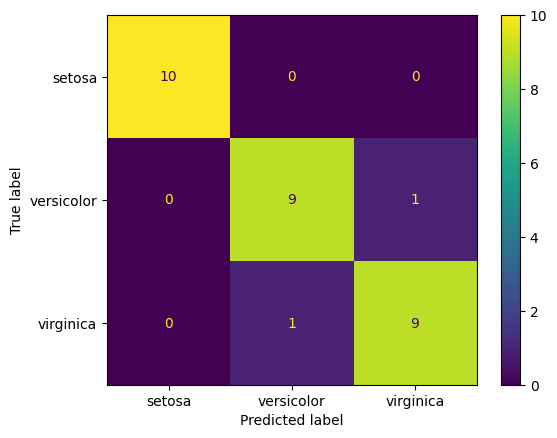

In [ ]:
# Plotting confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(tree_clf,
                                             X_test,
                                             y_test,
                                             display_labels=class_names)
plt.show()

From the confusion matrix above, we can see that the decision tree correctly classifies almost all the test instances. Specefically, class 0 (Setosa) is perfectly predicted. This is because the instances of Setosa form a single cluster (concentrated region), and don't mix with other classes. This is shown in the decision surface plot later on.  

Now we have trained the decision tree, let's visualize its structure. For this purpose, we use scikit-learn's [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) function.

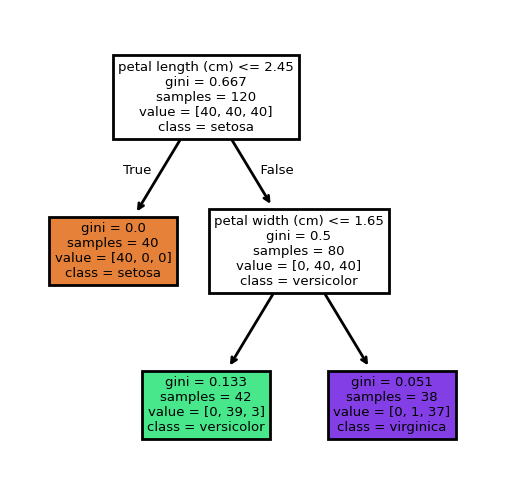

In [ ]:
# Decision tree visualization
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3, 3), dpi=200)
axes.plot(linewidth =0)
_ = plot_tree(tree_clf,
               feature_names = iris.feature_names,
               class_names=iris.target_names,
               filled = True,)

Let's peek into the information provided by the nodes of the tree. For now, we will consider the *leaf node with a green background*. However, the information provided by other nodes can be interpreted similarly. The left edge indicates 'True' while the right edge indicates 'False'.

**gini** represents the gini impurity associated with the node.

**samples** is the total number of instances that reached this node. It is the sum of all elements in the **value** list.

**value** is a list that represents instances from each class that reached this particular node during the training phase. In this node, `value = [0, 39, 3]` means 0 instances of Setosa, 39 instances of Versicolor, and 3 instances of Virginica reached this node.

**class** represents the class/label the decision tree would assign an instance reaching this node. This node has **class** Versicolor because most of the instances in this node are from Versicolor class.

You can also notice that the gini value decreases as the depth increases.

> **Note:**
> 
> In `scikit-learn`, if the **value** has an equal number of instances from two or more classes, the **class** will be assigned the label which comes earlier when sorted alphabetically. Can you verify this with the root node and the internal node?
>
> You can verify this behavior by examining the root node and an internal node in the decision tree.

### Visualizing the decision boundary

A decision tree performs recursive partitioning of the original data until it meets a stopping criterion (*depth* in our example above). The decision tree above has two nodes with test (split) functions. Each test results in an axis-parallel decision boundary. The first (root) node tests `petal length (cm) <= 2.45` while its child node (internal node) tests `petal width (cm) <= 1.65`. Both these split results into subsets that are purer (check the gini values) than the set in the root node. Below, we visualize the decision boundary and surface generated by each test function. The decision surface or the classification map allows us to visualize the regions of space that correspond to different classes. For example, all the samples that fall under the red region, will be labeled class 0 and so on.

In [11]:
# Taking only the features petal width and petal length for easier visualization
X = iris.data[:, [2, 3]]
y = iris.target

# Training a decision tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42).fit(X, y)

### Visualization code (utils.py)

In [12]:
#@title Visualization code (utils.py)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def decision_surface_visualization(X, y, tree_clf):
    plot_step = 0.02
    fig, ax = plt.subplots()
    fig.set_figheight(7)
    fig.set_figwidth(7)

    # For decision surface
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
    colors = ListedColormap(['r','g','b'])

    Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap= colors)

    # Decision boundary plotting ends

    scatter = ax.scatter(x=X[:, 0], y=X[:, 1], c=y, edgecolor='black',cmap=colors)

    # Produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Classes")
    ax.add_artist(legend1)

    # Produce a legend with a cross section of sizes from the scatter
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)

    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title("Decision boundary/surface visualization")
    plt.show()

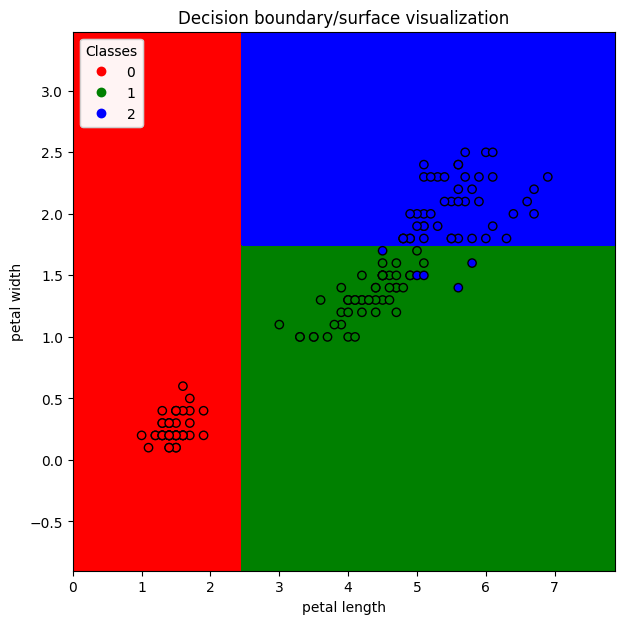

In [13]:
##from utils import decision_surface_visualization
decision_surface_visualization(X, y, tree_clf)

**Note**: Here class 0, 1 and 2 represent Setosa, Versicolor and Virginica respectively.



## Additional Resources

### Visualizing Decision Trees:
* Terence Parr and Prince Grover, How to visualize Decision Trees, https://explained.ai/decision-tree-viz/